In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# check data

In [2]:
data = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
# class = Abnormal and Normal

abnormal=data[data["class"]=="Abnormal"]
normal=data[data["class"]=="Normal"]

In [6]:

data.corr()

/tmp/ipykernel_20/4099628898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


/tmp/ipykernel_20/2701924160.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


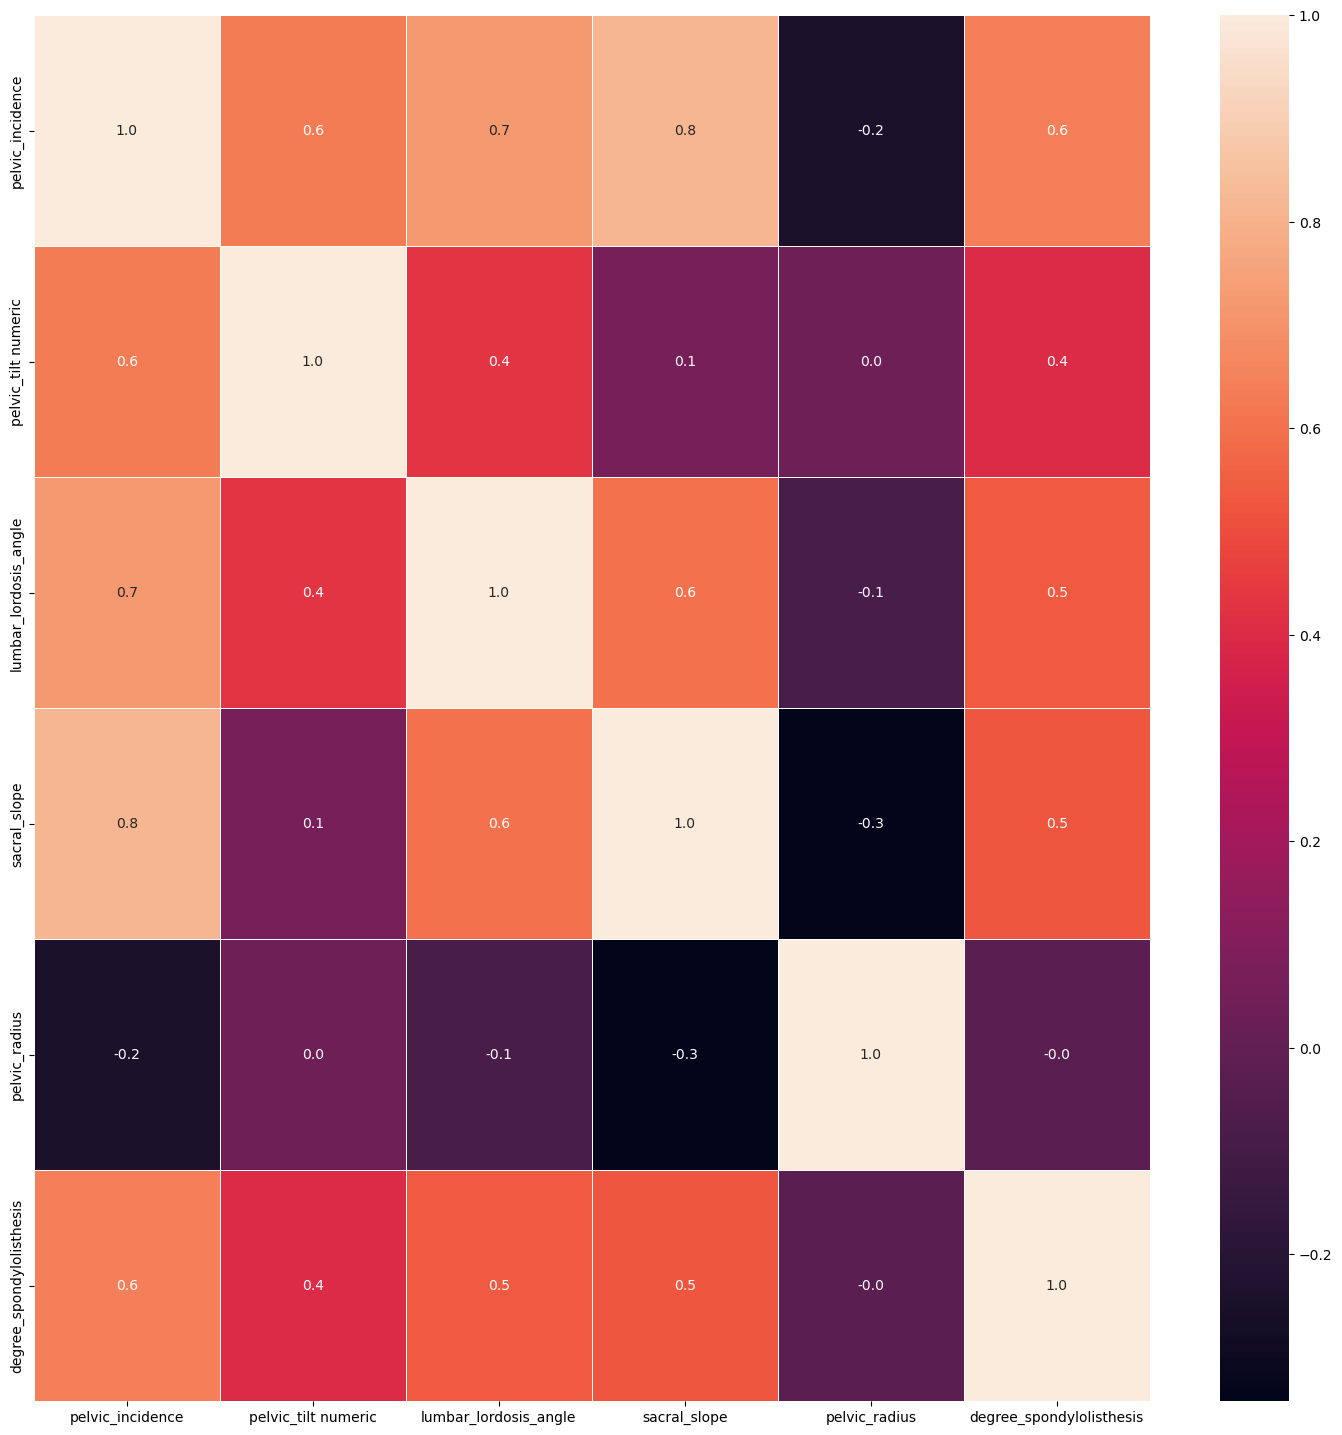

In [7]:
# heat map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


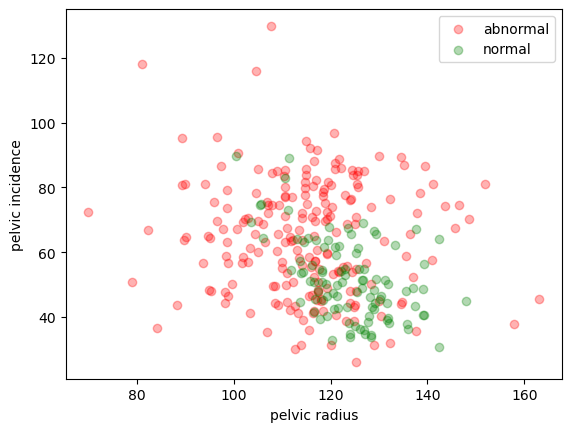

In [8]:
# scatter plot

plt.scatter(abnormal.pelvic_radius,abnormal.pelvic_incidence,color="red",label="abnormal",alpha=0.3)
plt.scatter(normal.pelvic_radius,normal.pelvic_incidence,color="green",label="normal",alpha=0.3)
plt.xlabel("pelvic radius")
plt.ylabel("pelvic incidence")
plt.legend()
plt.show()

In [9]:

y = [1 if i == "Abnormal" else 0 for i in data["class"]]
x_data=data.drop(["class"],axis=1)
#Normalization

x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))



/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [10]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 2)





In [11]:
# K-nearest Neighbour (KNN) Classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)# n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)


print("{} nn score: {}".format("3",knn.score(x_test, y_test)))


3 nn score: 0.7526881720430108


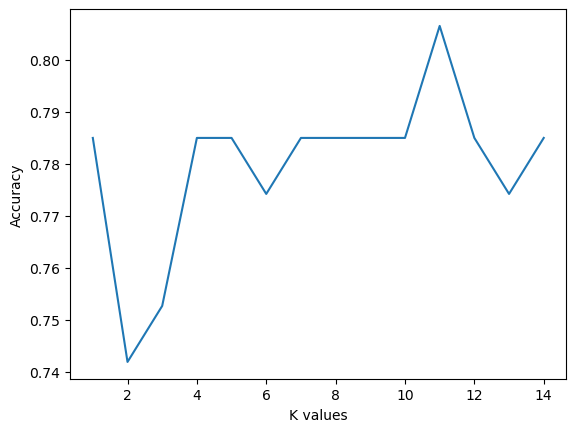

In [12]:
# find k value
score_list=[]

for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()


# best choice k =13

In [13]:


knn = KNeighborsClassifier(n_neighbors = 13)# n_neighbors = k

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)


print("{} nn score: {}".format("13",knn.score(x_test, y_test)*100))

13 nn score: 77.41935483870968


# best accuracy rate  %77,5
